In [1]:
# install.packages("LDlinkR")

In [1]:
library(qvalue)
library(dplyr)
library(LDlinkR)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
# CellRegMap association test

In [3]:
revision_folder = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/REVISION/"

In [4]:
crm_file = paste0(revision_folder, "CRM_association/summary.csv")
crm = read.csv(crm_file, row.names=1)
colnames(crm) = c("feature_id", "n_snps", "feature_chromosome","p_value","snp_id","p_value_Bonferroni") 
nrow(crm)
head(crm,2)

[1] 7157037

,feature_id,n_snps,feature_chromosome,p_value,snp_id,p_value_Bonferroni
0,ENSG00000250462,909,17,0.5215900,17_28857239_G_A,1
1,ENSG00000250462,909,17,0.6535075,17_28857794_C_T,1


In [5]:
crm = crm[order(crm$p_value),]
top_crm = crm[-which(duplicated(crm$feature_id)),]
nrow(top_crm)

[1] 7317

In [6]:
top_crm$global_corr_p_value = qvalue(top_crm$p_value_Bonferroni)$qvalues

In [7]:
nrow(top_crm[top_crm$global_corr_p_value<0.05,])

[1] 1112

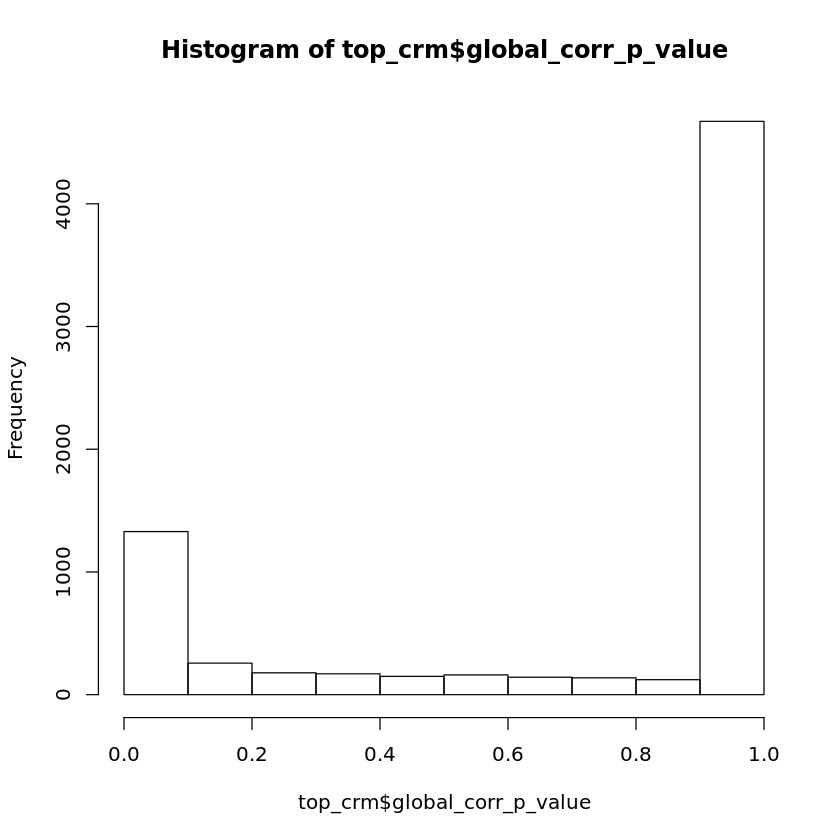

In [8]:
hist(top_crm$global_corr_p_value)

In [9]:
############### old results (Cuomo*, Seaton*, McCarthy* et al Nat Comm 2020)

In [10]:
# load lead variant results sc stages (iPS, mesendo, defendo)
leads.ips = read.csv("/nfs/leia/research/stegle/acuomo/mean/day0/all_expts/leads.csv", row.names = 1)
leads.mes = read.csv("/nfs/leia/research/stegle/acuomo/mean/mesendo_est_June20/leads.csv", row.names = 1)
leads.defendo = read.csv("/nfs/leia/research/stegle/acuomo/mean/defendo_est_June20/leads.csv", row.names = 1)

In [11]:
# add differentiation stage information
leads.ips$stage = "ips"
leads.mes$stage = "mesendo"
leads.defendo$stage = "defendo"

In [12]:
# merge results
endo_eqtl = rbind(leads.ips, 
                 leads.mes,
                 leads.defendo)

In [13]:
head(endo_eqtl,2)

beta,beta_se,empirical_feature_p_value,p_value,snp_id,feature,global_corr_p_value,chrom,pos,ref_allele,...,permutation_1,permutation_2,permutation_3,permutation_4,permutation_5,permutation_6,permutation_7,permutation_8,permutation_9,stage
-1.0048674,0.08005311,3.631688e-34,3.851118e-36,5_149826526_C_T,ENSG00000164587_RPS14,2.880363e-30,5,149826526,C,...,0.5867415,0.56508683,0.6296458,0.004683908,0.5159591,0.7734028,0.6450821,0.6001209,0.9876646,ips
-0.9881017,0.08648823,2.432216e-26,3.147553e-30,11_57283988_C_T,ENSG00000134809_TIMM10,8.853960e-23,11,57283988,C,...,0.1093548,0.08194005,0.6897261,0.683497330,0.5137511,0.7877572,0.6064095,0.5419861,0.5654441,ips


In [14]:
# pick top SNP across stages (min p_value)

In [15]:
# order by p_value
endo_eqtl = endo_eqtl[order(endo_eqtl$p_value),]
nrow(endo_eqtl)
head(endo_eqtl,2)

[1] 32665

,beta,beta_se,empirical_feature_p_value,p_value,snp_id,feature,global_corr_p_value,chrom,pos,ref_allele,...,permutation_1,permutation_2,permutation_3,permutation_4,permutation_5,permutation_6,permutation_7,permutation_8,permutation_9,stage
6,-1.457854,0.1020245,9.536615e-26,2.553619e-46,4_39446549_G_A,ENSG00000163682_RPL9,1.260613e-22,4,39446549,G,...,0.02499141,0.6516389,0.4681722,0.3833344,0.05690061,0.02657527,0.2945979,0.02514148,0.7088325,ips
12,1.801311,0.1333499,3.391301e-21,1.399851e-41,7_55806087_G_T,ENSG00000226278_PSPHP1,2.241423e-18,7,55806087,G,...,0.10854778,0.0611202,0.3728356,0.2267340,0.60751447,0.24224812,0.6809891,0.47102673,0.2149549,ips


In [16]:
# select only one SNP per gene 
endo_eqtl = endo_eqtl[-which(duplicated(endo_eqtl$feature)),]
nrow(endo_eqtl)

[1] 10788

In [17]:
################ compare results

In [18]:
## first, check if lead SNP is the same (or in LD)

In [19]:
res=top_crm

In [24]:
T = 0.1
## consider significant hits only
endo_eqtl = endo_eqtl[endo_eqtl$global_corr_p_value <= T,]
res = res[res$global_corr_p_value <= T,]

In [25]:
nrow(endo_eqtl)
nrow(res)

[1] 3079

[1] 1329

In [26]:
endo_eqtl$feature_id = gsub("_.*","",endo_eqtl$feature)

In [27]:

cols = c("feature_id","snp_id")
df = inner_join(endo_eqtl[,c("stage",cols)], res[,cols], by = c("feature_id"), suffix=c(".old",".new"))

In [28]:
head(df)

stage,feature_id,snp_id.old,snp_id.new
ips,ENSG00000163682,4_39446549_G_A,4_39452499_T_C
ips,ENSG00000226278,7_55806087_G_T,7_55833413_A_C
ips,ENSG00000254870,6_31486901_T_C,6_31486901_T_C
ips,ENSG00000170291,17_7151111_A_C,17_7145981_T_C
ips,ENSG00000198563,6_31486901_T_C,6_31486901_T_C
ips,ENSG00000196126,6_32597313_T_C,6_32604969_A_G


In [29]:
# collect all SNPs
all_snps = unique(c(as.character(df$snp_id.old), as.character(df$snp_id.new)))
length(all_snps)
head(all_snps)

[1] 1701

[1] "4_39446549_G_A" "7_55806087_G_T" "6_31486901_T_C" "17_7151111_A_C"
[5] "6_32597313_T_C" "6_31132414_G_A"

In [30]:
snp_df = data.frame(snp=all_snps)
head(snp_df,2)

snp
4_39446549_G_A
7_55806087_G_T


In [31]:
nrow(snp_df)

[1] 1701

In [32]:
# write.csv(snp_df, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/REVISION/limix_qtl_pipeline_Gtest/top_snps_to_compare.csv")

In [33]:
nrow(df)

[1] 984

In [34]:
# re-format SNPs
# from 19_2908680_T_C to chr19:2908680

In [35]:
S1 = unlist(strsplit(as.character(df$snp_id.old),"_"))
chrs = c()
snps = c()
for (i in seq(1,(length(S1)-1),4)){
   chrs = c(chrs,S1[i]) 
}
for (i in seq(2,(length(S1)-1),4)){
   snps = c(snps,S1[i]) 
}
df$snp1 = paste0("chr",chrs,":",snps)

In [36]:
S2 = unlist(strsplit(as.character(df$snp_id.new),"_"))
chrs = c()
snps = c()
for (i in seq(1,(length(S2)-1),4)){
   chrs = c(chrs,S2[i]) 
}
for (i in seq(2,(length(S2)-1),4)){
   snps = c(snps,S2[i]) 
}
df$snp2 = paste0("chr",chrs,":",snps)

In [37]:
tail(df,2)

,stage,feature_id,snp_id.old,snp_id.new,snp1,snp2
983,mesendo,ENSG00000103266,16_681741_T_A,16_746613_G_A,chr16:681741,chr16:746613
984,mesendo,ENSG00000125995,20_34202645_C_G,20_34251693_A_G,chr20:34202645,chr20:34251693


In [38]:
nrow(df)

[1] 984

In [45]:
df$d = NA
for (i in 1:nrow(df)){
    print(i)
    snp1 = as.character(df[i,"snp1"])
    snp2 = as.character(df[i,"snp2"])
#     print(snp1)
#     print(snp2)
    try({df[i,"d"] = as.numeric(LDpair(snp1, snp2, pop = "GBR", token = "f88ab64286ce")$d_prime)})
}

[1] 1



LDlink server is working...



[1] 2



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 3



LDlink server is working...



[1] 4



LDlink server is working...



[1] 5



LDlink server is working...



[1] 6



LDlink server is working...



[1] 7



LDlink server is working...



[1] 8



LDlink server is working...



[1] 9



LDlink server is working...



[1] 10



LDlink server is working...



[1] 11



LDlink server is working...



[1] 12



LDlink server is working...



[1] 13



LDlink server is working...



[1] 14



LDlink server is working...



[1] 15



LDlink server is working...



[1] 16



LDlink server is working...



[1] 17



LDlink server is working...



[1] 18



LDlink server is working...



[1] 19



LDlink server is working...



[1] 20



LDlink server is working...



[1] 21



LDlink server is working...



[1] 22



LDlink server is working...



[1] 23



LDlink server is working...



[1] 24



LDlink server is working...



[1] 25



LDlink server is working...



[1] 26



LDlink server is working...



[1] 27



LDlink server is working...



[1] 28



LDlink server is working...



[1] 29



LDlink server is working...



[1] 30



LDlink server is working...



[1] 31



LDlink server is working...



[1] 32



LDlink server is working...



[1] 33



LDlink server is working...



[1] 34



LDlink server is working...



[1] 35



LDlink server is working...



[1] 36



LDlink server is working...



[1] 37



LDlink server is working...



[1] 38



LDlink server is working...



[1] 39



LDlink server is working...



[1] 40



LDlink server is working...



[1] 41



LDlink server is working...



[1] 42



LDlink server is working...



[1] 43



LDlink server is working...



[1] 44



LDlink server is working...



[1] 45



LDlink server is working...



[1] 46



LDlink server is working...



[1] 47



LDlink server is working...



[1] 48



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 49



LDlink server is working...



[1] 50



LDlink server is working...



[1] 51



LDlink server is working...



[1] 52



LDlink server is working...



[1] 53



LDlink server is working...



[1] 54



LDlink server is working...



[1] 55



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 56



LDlink server is working...



[1] 57



LDlink server is working...



[1] 58



LDlink server is working...



[1] 59



LDlink server is working...



[1] 60



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 61



LDlink server is working...



[1] 62



LDlink server is working...



[1] 63



LDlink server is working...



[1] 64



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 65



LDlink server is working...



[1] 66



LDlink server is working...



[1] 67



LDlink server is working...



[1] 68



LDlink server is working...



[1] 69



LDlink server is working...



[1] 70



LDlink server is working...



[1] 71



LDlink server is working...



[1] 72



LDlink server is working...



[1] 73



LDlink server is working...



[1] 74



LDlink server is working...



[1] 75



LDlink server is working...



[1] 76



LDlink server is working...



[1] 77



LDlink server is working...



[1] 78



LDlink server is working...



[1] 79



LDlink server is working...



[1] 80



LDlink server is working...



[1] 81



LDlink server is working...



[1] 82



LDlink server is working...



[1] 83



LDlink server is working...



[1] 84



LDlink server is working...



[1] 85



LDlink server is working...



[1] 86



LDlink server is working...



[1] 87



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 88



LDlink server is working...



[1] 89



LDlink server is working...



[1] 90



LDlink server is working...



[1] 91



LDlink server is working...



[1] 92



LDlink server is working...



[1] 93



LDlink server is working...



[1] 94



LDlink server is working...



[1] 95



LDlink server is working...



[1] 96



LDlink server is working...



[1] 97



LDlink server is working...



[1] 98



LDlink server is working...



[1] 99



LDlink server is working...



[1] 100



LDlink server is working...



[1] 101



LDlink server is working...



[1] 102



LDlink server is working...



[1] 103



LDlink server is working...



[1] 104



LDlink server is working...



[1] 105



LDlink server is working...



[1] 106



LDlink server is working...



[1] 107



LDlink server is working...



[1] 108



LDlink server is working...



[1] 109



LDlink server is working...



[1] 110



LDlink server is working...



[1] 111



LDlink server is working...



[1] 112



LDlink server is working...



[1] 113



LDlink server is working...



[1] 114



LDlink server is working...



[1] 115



LDlink server is working...



[1] 116



LDlink server is working...



[1] 117



LDlink server is working...



[1] 118



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 119



LDlink server is working...



[1] 120



LDlink server is working...



[1] 121



LDlink server is working...



[1] 122



LDlink server is working...



[1] 123



LDlink server is working...



[1] 124



LDlink server is working...



[1] 125



LDlink server is working...



[1] 126



LDlink server is working...



[1] 127



LDlink server is working...



[1] 128



LDlink server is working...



[1] 129



LDlink server is working...



[1] 130



LDlink server is working...



[1] 131



LDlink server is working...



[1] 132



LDlink server is working...



[1] 133



LDlink server is working...



[1] 134



LDlink server is working...



[1] 135



LDlink server is working...



[1] 136



LDlink server is working...



[1] 137



LDlink server is working...



[1] 138



LDlink server is working...



[1] 139



LDlink server is working...



[1] 140



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 141



LDlink server is working...



[1] 142



LDlink server is working...



[1] 143



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 144



LDlink server is working...



[1] 145



LDlink server is working...



[1] 146



LDlink server is working...



[1] 147



LDlink server is working...



[1] 148



LDlink server is working...



[1] 149



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 150



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 151



LDlink server is working...



[1] 152



LDlink server is working...



[1] 153



LDlink server is working...



[1] 154



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 155



LDlink server is working...



[1] 156



LDlink server is working...



[1] 157



LDlink server is working...



[1] 158



LDlink server is working...



[1] 159



LDlink server is working...



[1] 160



LDlink server is working...



[1] 161



LDlink server is working...



[1] 162



LDlink server is working...



[1] 163



LDlink server is working...



[1] 164



LDlink server is working...



[1] 165



LDlink server is working...



[1] 166



LDlink server is working...



[1] 167



LDlink server is working...



[1] 168



LDlink server is working...



[1] 169



LDlink server is working...



[1] 170



LDlink server is working...



[1] 171



LDlink server is working...



[1] 172



LDlink server is working...



[1] 173



LDlink server is working...



[1] 174



LDlink server is working...



[1] 175



LDlink server is working...



[1] 176



LDlink server is working...



[1] 177



LDlink server is working...



[1] 178



LDlink server is working...



[1] 179



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 180



LDlink server is working...



[1] 181



LDlink server is working...



[1] 182



LDlink server is working...



[1] 183



LDlink server is working...



[1] 184



LDlink server is working...



[1] 185



LDlink server is working...



[1] 186



LDlink server is working...



[1] 187



LDlink server is working...



[1] 188



LDlink server is working...



[1] 189



LDlink server is working...



[1] 190



LDlink server is working...



[1] 191



LDlink server is working...



[1] 192



LDlink server is working...



[1] 193



LDlink server is working...



[1] 194



LDlink server is working...



[1] 195



LDlink server is working...



[1] 196



LDlink server is working...



[1] 197



LDlink server is working...



[1] 198



LDlink server is working...



[1] 199



LDlink server is working...



[1] 200



LDlink server is working...



[1] 201



LDlink server is working...



[1] 202



LDlink server is working...



[1] 203



LDlink server is working...



[1] 204



LDlink server is working...



[1] 205



LDlink server is working...



[1] 206



LDlink server is working...



[1] 207



LDlink server is working...



[1] 208



LDlink server is working...



[1] 209



LDlink server is working...



[1] 210



LDlink server is working...



[1] 211



LDlink server is working...



[1] 212



LDlink server is working...



[1] 213



LDlink server is working...



[1] 214



LDlink server is working...



[1] 215



LDlink server is working...



[1] 216



LDlink server is working...



[1] 217



LDlink server is working...



[1] 218



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 219



LDlink server is working...



[1] 220



LDlink server is working...



[1] 221



LDlink server is working...



[1] 222



LDlink server is working...



[1] 223



LDlink server is working...



[1] 224



LDlink server is working...



[1] 225



LDlink server is working...



[1] 226



LDlink server is working...



[1] 227



LDlink server is working...



[1] 228



LDlink server is working...



[1] 229



LDlink server is working...



[1] 230



LDlink server is working...



[1] 231



LDlink server is working...



[1] 232



LDlink server is working...



[1] 233



LDlink server is working...



[1] 234



LDlink server is working...



[1] 235



LDlink server is working...



[1] 236



LDlink server is working...



[1] 237



LDlink server is working...



[1] 238



LDlink server is working...



[1] 239



LDlink server is working...



[1] 240



LDlink server is working...



[1] 241



LDlink server is working...



[1] 242



LDlink server is working...



[1] 243



LDlink server is working...



[1] 244



LDlink server is working...



[1] 245



LDlink server is working...



[1] 246



LDlink server is working...



[1] 247



LDlink server is working...



[1] 248



LDlink server is working...



[1] 249



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 250



LDlink server is working...



[1] 251



LDlink server is working...



[1] 252



LDlink server is working...



[1] 253



LDlink server is working...



[1] 254



LDlink server is working...



[1] 255



LDlink server is working...



[1] 256



LDlink server is working...



[1] 257



LDlink server is working...



[1] 258



LDlink server is working...



[1] 259



LDlink server is working...



[1] 260



LDlink server is working...



[1] 261



LDlink server is working...



[1] 262



LDlink server is working...



[1] 263



LDlink server is working...



[1] 264



LDlink server is working...



[1] 265



LDlink server is working...



[1] 266



LDlink server is working...



[1] 267



LDlink server is working...



[1] 268



LDlink server is working...



[1] 269



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 270



LDlink server is working...



[1] 271



LDlink server is working...



[1] 272



LDlink server is working...



[1] 273



LDlink server is working...



[1] 274



LDlink server is working...



[1] 275



LDlink server is working...



[1] 276



LDlink server is working...



[1] 277



LDlink server is working...



[1] 278



LDlink server is working...



[1] 279



LDlink server is working...



[1] 280



LDlink server is working...



[1] 281



LDlink server is working...



[1] 282



LDlink server is working...



[1] 283



LDlink server is working...



[1] 284



LDlink server is working...



[1] 285



LDlink server is working...



[1] 286



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 287



LDlink server is working...



[1] 288



LDlink server is working...



[1] 289



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 290



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 291



LDlink server is working...



[1] 292



LDlink server is working...



[1] 293



LDlink server is working...



[1] 294



LDlink server is working...



[1] 295



LDlink server is working...



[1] 296



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 297



LDlink server is working...



[1] 298



LDlink server is working...



[1] 299



LDlink server is working...



[1] 300



LDlink server is working...



[1] 301



LDlink server is working...



[1] 302



LDlink server is working...



[1] 303



LDlink server is working...



[1] 304



LDlink server is working...



[1] 305



LDlink server is working...



[1] 306



LDlink server is working...



[1] 307



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 308



LDlink server is working...



[1] 309



LDlink server is working...



[1] 310



LDlink server is working...



[1] 311



LDlink server is working...



[1] 312



LDlink server is working...



[1] 313



LDlink server is working...



[1] 314



LDlink server is working...



[1] 315



LDlink server is working...



[1] 316



LDlink server is working...



[1] 317



LDlink server is working...



[1] 318



LDlink server is working...



[1] 319



LDlink server is working...



[1] 320



LDlink server is working...



[1] 321



LDlink server is working...



[1] 322



LDlink server is working...



[1] 323



LDlink server is working...



Error in LDpair(snp1, snp2, pop = "GBR", token = "f88ab64286ce") : 
  Internal Server Error (HTTP 500).
[1] 324



LDlink server is working...



[1] 325



LDlink server is working...



[1] 326



LDlink server is working...



[1] 327



LDlink server is working...



[1] 328



LDlink server is working...



[1] 329



LDlink server is working...



[1] 330



LDlink server is working...



[1] 331



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 332



LDlink server is working...



[1] 333



LDlink server is working...



[1] 334



LDlink server is working...



[1] 335



LDlink server is working...



[1] 336



LDlink server is working...



[1] 337



LDlink server is working...



[1] 338



LDlink server is working...



[1] 339



LDlink server is working...



[1] 340



LDlink server is working...



[1] 341



LDlink server is working...



[1] 342



LDlink server is working...



[1] 343



LDlink server is working...



[1] 344



LDlink server is working...



[1] 345



LDlink server is working...



[1] 346



LDlink server is working...



[1] 347



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 348



LDlink server is working...



[1] 349



LDlink server is working...



[1] 350



LDlink server is working...



[1] 351



LDlink server is working...



[1] 352



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 353



LDlink server is working...



[1] 354



LDlink server is working...



[1] 355



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 356



LDlink server is working...



[1] 357



LDlink server is working...



[1] 358



LDlink server is working...



[1] 359



LDlink server is working...



[1] 360



LDlink server is working...



[1] 361



LDlink server is working...



[1] 362



LDlink server is working...



[1] 363



LDlink server is working...



[1] 364



LDlink server is working...



[1] 365



LDlink server is working...



[1] 366



LDlink server is working...



[1] 367



LDlink server is working...



[1] 368



LDlink server is working...



[1] 369



LDlink server is working...



[1] 370



LDlink server is working...



[1] 371



LDlink server is working...



[1] 372



LDlink server is working...



[1] 373



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 374



LDlink server is working...



[1] 375



LDlink server is working...



[1] 376



LDlink server is working...



[1] 377



LDlink server is working...



[1] 378



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 379



LDlink server is working...



[1] 380



LDlink server is working...



[1] 381



LDlink server is working...



[1] 382



LDlink server is working...



[1] 383



LDlink server is working...



[1] 384



LDlink server is working...



[1] 385



LDlink server is working...



[1] 386



LDlink server is working...



[1] 387



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 388



LDlink server is working...



[1] 389



LDlink server is working...



[1] 390



LDlink server is working...



[1] 391



LDlink server is working...



[1] 392



LDlink server is working...



[1] 393



LDlink server is working...



[1] 394



LDlink server is working...



[1] 395



LDlink server is working...



[1] 396



LDlink server is working...



[1] 397



LDlink server is working...



[1] 398



LDlink server is working...



[1] 399



LDlink server is working...



[1] 400



LDlink server is working...



[1] 401



LDlink server is working...



[1] 402



LDlink server is working...



[1] 403



LDlink server is working...



[1] 404



LDlink server is working...



[1] 405



LDlink server is working...



[1] 406



LDlink server is working...



[1] 407



LDlink server is working...



[1] 408



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 409



LDlink server is working...



[1] 410



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 411



LDlink server is working...



[1] 412



LDlink server is working...



[1] 413



LDlink server is working...



[1] 414



LDlink server is working...



[1] 415



LDlink server is working...



[1] 416



LDlink server is working...



[1] 417



LDlink server is working...



[1] 418



LDlink server is working...



[1] 419



LDlink server is working...



[1] 420



LDlink server is working...



[1] 421



LDlink server is working...



[1] 422



LDlink server is working...



[1] 423



LDlink server is working...



[1] 424



LDlink server is working...



[1] 425



LDlink server is working...



[1] 426



LDlink server is working...



[1] 427



LDlink server is working...



[1] 428



LDlink server is working...



[1] 429



LDlink server is working...



[1] 430



LDlink server is working...



[1] 431



LDlink server is working...



[1] 432



LDlink server is working...



[1] 433



LDlink server is working...



[1] 434



LDlink server is working...



[1] 435



LDlink server is working...



[1] 436



LDlink server is working...



[1] 437



LDlink server is working...



[1] 438



LDlink server is working...



[1] 439



LDlink server is working...



[1] 440



LDlink server is working...



[1] 441



LDlink server is working...



[1] 442



LDlink server is working...



[1] 443



LDlink server is working...



[1] 444



LDlink server is working...



[1] 445



LDlink server is working...



[1] 446



LDlink server is working...



[1] 447



LDlink server is working...



[1] 448



LDlink server is working...



[1] 449



LDlink server is working...



[1] 450



LDlink server is working...



[1] 451



LDlink server is working...



[1] 452



LDlink server is working...



[1] 453



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 454



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 455



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 456



LDlink server is working...



[1] 457



LDlink server is working...



[1] 458



LDlink server is working...



[1] 459



LDlink server is working...



[1] 460



LDlink server is working...



[1] 461



LDlink server is working...



[1] 462



LDlink server is working...



[1] 463



LDlink server is working...



[1] 464



LDlink server is working...



[1] 465



LDlink server is working...



[1] 466



LDlink server is working...



[1] 467



LDlink server is working...



[1] 468



LDlink server is working...



[1] 469



LDlink server is working...



[1] 470



LDlink server is working...



[1] 471



LDlink server is working...



[1] 472



LDlink server is working...



[1] 473



LDlink server is working...



[1] 474



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 475



LDlink server is working...



[1] 476



LDlink server is working...



[1] 477



LDlink server is working...



[1] 478



LDlink server is working...



[1] 479



LDlink server is working...



[1] 480



LDlink server is working...



[1] 481



LDlink server is working...



[1] 482



LDlink server is working...



[1] 483



LDlink server is working...



[1] 484



LDlink server is working...



[1] 485



LDlink server is working...



[1] 486



LDlink server is working...



[1] 487



LDlink server is working...



[1] 488



LDlink server is working...



[1] 489



LDlink server is working...



[1] 490



LDlink server is working...



[1] 491



LDlink server is working...



[1] 492



LDlink server is working...



[1] 493



LDlink server is working...



[1] 494



LDlink server is working...



[1] 495



LDlink server is working...



[1] 496



LDlink server is working...



[1] 497



LDlink server is working...



[1] 498



LDlink server is working...



[1] 499



LDlink server is working...



[1] 500



LDlink server is working...



[1] 501



LDlink server is working...



[1] 502



LDlink server is working...



[1] 503



LDlink server is working...



[1] 504



LDlink server is working...



[1] 505



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 506



LDlink server is working...



[1] 507



LDlink server is working...



[1] 508



LDlink server is working...



[1] 509



LDlink server is working...



[1] 510



LDlink server is working...



[1] 511



LDlink server is working...



[1] 512



LDlink server is working...



[1] 513



LDlink server is working...



[1] 514



LDlink server is working...



[1] 515



LDlink server is working...



[1] 516



LDlink server is working...



[1] 517



LDlink server is working...



[1] 518



LDlink server is working...



[1] 519



LDlink server is working...



[1] 520



LDlink server is working...



[1] 521



LDlink server is working...



[1] 522



LDlink server is working...



[1] 523



LDlink server is working...



[1] 524



LDlink server is working...



[1] 525



LDlink server is working...



[1] 526



LDlink server is working...



[1] 527



LDlink server is working...



[1] 528



LDlink server is working...



[1] 529



LDlink server is working...



[1] 530



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 531



LDlink server is working...



[1] 532



LDlink server is working...



[1] 533



LDlink server is working...



[1] 534



LDlink server is working...



[1] 535



LDlink server is working...



[1] 536



LDlink server is working...



[1] 537



LDlink server is working...



[1] 538



LDlink server is working...



[1] 539



LDlink server is working...



[1] 540



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 541



LDlink server is working...



[1] 542



LDlink server is working...



[1] 543



LDlink server is working...



[1] 544



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 545



LDlink server is working...



[1] 546



LDlink server is working...



[1] 547



LDlink server is working...



[1] 548



LDlink server is working...



[1] 549



LDlink server is working...



[1] 550



LDlink server is working...



[1] 551



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 552



LDlink server is working...



[1] 553



LDlink server is working...



[1] 554



LDlink server is working...



[1] 555



LDlink server is working...



[1] 556



LDlink server is working...



[1] 557



LDlink server is working...



[1] 558



LDlink server is working...



[1] 559



LDlink server is working...



[1] 560



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 561



LDlink server is working...



[1] 562



LDlink server is working...



[1] 563



LDlink server is working...



[1] 564



LDlink server is working...



[1] 565



LDlink server is working...



[1] 566



LDlink server is working...



[1] 567



LDlink server is working...



[1] 568



LDlink server is working...



[1] 569



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 570



LDlink server is working...



[1] 571



LDlink server is working...



[1] 572



LDlink server is working...



[1] 573



LDlink server is working...



[1] 574



LDlink server is working...



[1] 575



LDlink server is working...



[1] 576



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 577



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 578



LDlink server is working...



[1] 579



LDlink server is working...



[1] 580



LDlink server is working...



[1] 581



LDlink server is working...



[1] 582



LDlink server is working...



[1] 583



LDlink server is working...



[1] 584



LDlink server is working...



[1] 585



LDlink server is working...



[1] 586



LDlink server is working...



[1] 587



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 588



LDlink server is working...



[1] 589



LDlink server is working...



[1] 590



LDlink server is working...



[1] 591



LDlink server is working...



[1] 592



LDlink server is working...



[1] 593



LDlink server is working...



[1] 594



LDlink server is working...



[1] 595



LDlink server is working...



[1] 596



LDlink server is working...



[1] 597



LDlink server is working...



[1] 598



LDlink server is working...



[1] 599



LDlink server is working...



[1] 600



LDlink server is working...



[1] 601



LDlink server is working...



[1] 602



LDlink server is working...



[1] 603



LDlink server is working...



[1] 604



LDlink server is working...



[1] 605



LDlink server is working...



[1] 606



LDlink server is working...



[1] 607



LDlink server is working...



[1] 608



LDlink server is working...



[1] 609



LDlink server is working...



[1] 610



LDlink server is working...



[1] 611



LDlink server is working...



[1] 612



LDlink server is working...



[1] 613



LDlink server is working...



[1] 614



LDlink server is working...



[1] 615



LDlink server is working...



[1] 616



LDlink server is working...



[1] 617



LDlink server is working...



[1] 618



LDlink server is working...



[1] 619



LDlink server is working...



[1] 620



LDlink server is working...



[1] 621



LDlink server is working...



[1] 622



LDlink server is working...



[1] 623



LDlink server is working...



[1] 624



LDlink server is working...



[1] 625



LDlink server is working...



[1] 626



LDlink server is working...



[1] 627



LDlink server is working...



[1] 628



LDlink server is working...



[1] 629



LDlink server is working...



[1] 630



LDlink server is working...



[1] 631



LDlink server is working...



[1] 632



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 633



LDlink server is working...



[1] 634



LDlink server is working...



[1] 635



LDlink server is working...



[1] 636



LDlink server is working...



[1] 637



LDlink server is working...



[1] 638



LDlink server is working...



[1] 639



LDlink server is working...



[1] 640



LDlink server is working...



[1] 641



LDlink server is working...



[1] 642



LDlink server is working...



[1] 643



LDlink server is working...



[1] 644



LDlink server is working...



[1] 645



LDlink server is working...



[1] 646



LDlink server is working...



[1] 647



LDlink server is working...



[1] 648



LDlink server is working...



[1] 649



LDlink server is working...



[1] 650



LDlink server is working...



[1] 651



LDlink server is working...



[1] 652



LDlink server is working...



[1] 653



LDlink server is working...



[1] 654



LDlink server is working...



[1] 655



LDlink server is working...



[1] 656



LDlink server is working...



[1] 657



LDlink server is working...



[1] 658



LDlink server is working...



[1] 659



LDlink server is working...



[1] 660



LDlink server is working...



[1] 661



LDlink server is working...



[1] 662



LDlink server is working...



[1] 663



LDlink server is working...



[1] 664



LDlink server is working...



[1] 665



LDlink server is working...



[1] 666



LDlink server is working...



[1] 667



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 668



LDlink server is working...



[1] 669



LDlink server is working...



[1] 670



LDlink server is working...



[1] 671



LDlink server is working...



[1] 672



LDlink server is working...



[1] 673



LDlink server is working...



[1] 674



LDlink server is working...



[1] 675



LDlink server is working...



[1] 676



LDlink server is working...



[1] 677



LDlink server is working...



[1] 678



LDlink server is working...



[1] 679



LDlink server is working...



[1] 680



LDlink server is working...



[1] 681



LDlink server is working...



[1] 682



LDlink server is working...



[1] 683



LDlink server is working...



[1] 684



LDlink server is working...



[1] 685



LDlink server is working...



[1] 686



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 687



LDlink server is working...



[1] 688



LDlink server is working...



[1] 689



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 690



LDlink server is working...



[1] 691



LDlink server is working...



[1] 692



LDlink server is working...



[1] 693



LDlink server is working...



[1] 694



LDlink server is working...



[1] 695



LDlink server is working...



[1] 696



LDlink server is working...



[1] 697



LDlink server is working...



[1] 698



LDlink server is working...



[1] 699



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 700



LDlink server is working...



[1] 701



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 702



LDlink server is working...



[1] 703



LDlink server is working...



[1] 704



LDlink server is working...



[1] 705



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 706



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 707



LDlink server is working...



[1] 708



LDlink server is working...



[1] 709



LDlink server is working...



[1] 710



LDlink server is working...



[1] 711



LDlink server is working...



[1] 712



LDlink server is working...



[1] 713



LDlink server is working...



[1] 714



LDlink server is working...



[1] 715



LDlink server is working...



[1] 716



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 717



LDlink server is working...



[1] 718



LDlink server is working...



[1] 719



LDlink server is working...



[1] 720



LDlink server is working...



[1] 721



LDlink server is working...



[1] 722



LDlink server is working...



[1] 723



LDlink server is working...



[1] 724



LDlink server is working...



[1] 725



LDlink server is working...



[1] 726



LDlink server is working...



[1] 727



LDlink server is working...



[1] 728



LDlink server is working...



[1] 729



LDlink server is working...



[1] 730



LDlink server is working...



[1] 731



LDlink server is working...



[1] 732



LDlink server is working...



[1] 733



LDlink server is working...



[1] 734



LDlink server is working...



[1] 735



LDlink server is working...



[1] 736



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 737



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 738



LDlink server is working...



[1] 739



LDlink server is working...



[1] 740



LDlink server is working...



[1] 741



LDlink server is working...



[1] 742



LDlink server is working...



[1] 743



LDlink server is working...



[1] 744



LDlink server is working...



[1] 745



LDlink server is working...



[1] 746



LDlink server is working...



[1] 747



LDlink server is working...



[1] 748



LDlink server is working...



[1] 749



LDlink server is working...



[1] 750



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 751



LDlink server is working...



[1] 752



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 753



LDlink server is working...



[1] 754



LDlink server is working...



[1] 755



LDlink server is working...



[1] 756



LDlink server is working...



[1] 757



LDlink server is working...



[1] 758



LDlink server is working...



[1] 759



LDlink server is working...



[1] 760



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 761



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 762



LDlink server is working...



[1] 763



LDlink server is working...



[1] 764



LDlink server is working...



[1] 765



LDlink server is working...



[1] 766



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 767



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 768



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 769



LDlink server is working...



[1] 770



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 771



LDlink server is working...



[1] 772



LDlink server is working...



[1] 773



LDlink server is working...



[1] 774



LDlink server is working...



[1] 775



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 776



LDlink server is working...



[1] 777



LDlink server is working...



[1] 778



LDlink server is working...



[1] 779



LDlink server is working...



[1] 780



LDlink server is working...



[1] 781



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 782



LDlink server is working...



[1] 783



LDlink server is working...



[1] 784



LDlink server is working...



[1] 785



LDlink server is working...



[1] 786



LDlink server is working...



[1] 787



LDlink server is working...



[1] 788



LDlink server is working...



[1] 789



LDlink server is working...



[1] 790



LDlink server is working...



[1] 791



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 792



LDlink server is working...



[1] 793



LDlink server is working...



[1] 794



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 795



LDlink server is working...



[1] 796



LDlink server is working...



[1] 797



LDlink server is working...



[1] 798



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 799



LDlink server is working...



[1] 800



LDlink server is working...



[1] 801



LDlink server is working...



[1] 802



LDlink server is working...



[1] 803



LDlink server is working...



[1] 804



LDlink server is working...



[1] 805



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 806



LDlink server is working...



[1] 807



LDlink server is working...



[1] 808



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 809



LDlink server is working...



[1] 810



LDlink server is working...



[1] 811



LDlink server is working...



[1] 812



LDlink server is working...



[1] 813



LDlink server is working...



[1] 814



LDlink server is working...



[1] 815



LDlink server is working...



[1] 816



LDlink server is working...



[1] 817



LDlink server is working...



[1] 818



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 819



LDlink server is working...



[1] 820



LDlink server is working...



[1] 821



LDlink server is working...



[1] 822



LDlink server is working...



[1] 823



LDlink server is working...



[1] 824



LDlink server is working...



[1] 825



LDlink server is working...



[1] 826



LDlink server is working...



[1] 827



LDlink server is working...



[1] 828



LDlink server is working...



[1] 829



LDlink server is working...



[1] 830



LDlink server is working...



[1] 831



LDlink server is working...



[1] 832



LDlink server is working...



[1] 833



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 834



LDlink server is working...



[1] 835



LDlink server is working...



[1] 836



LDlink server is working...



[1] 837



LDlink server is working...



[1] 838



LDlink server is working...



[1] 839



LDlink server is working...



[1] 840



LDlink server is working...



[1] 841



LDlink server is working...



[1] 842



LDlink server is working...



[1] 843



LDlink server is working...



[1] 844



LDlink server is working...



[1] 845



LDlink server is working...



[1] 846



LDlink server is working...



[1] 847



LDlink server is working...



[1] 848



LDlink server is working...



[1] 849



LDlink server is working...



[1] 850



LDlink server is working...



[1] 851



LDlink server is working...



[1] 852



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 853



LDlink server is working...



[1] 854



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 855



LDlink server is working...



[1] 856



LDlink server is working...



[1] 857



LDlink server is working...



[1] 858



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 859



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 860



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 861



LDlink server is working...



[1] 862



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 863



LDlink server is working...



[1] 864



LDlink server is working...



[1] 865



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 866



LDlink server is working...



[1] 867



LDlink server is working...



[1] 868



LDlink server is working...



[1] 869



LDlink server is working...



[1] 870



LDlink server is working...



[1] 871



LDlink server is working...



[1] 872



LDlink server is working...



[1] 873



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 874



LDlink server is working...



[1] 875



LDlink server is working...



[1] 876



LDlink server is working...



[1] 877



LDlink server is working...



[1] 878



LDlink server is working...



[1] 879



LDlink server is working...



[1] 880



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 881



LDlink server is working...



[1] 882



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 883



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 884



LDlink server is working...



[1] 885



LDlink server is working...



[1] 886



LDlink server is working...



[1] 887



LDlink server is working...



[1] 888



LDlink server is working...



[1] 889



LDlink server is working...



[1] 890



LDlink server is working...



[1] 891



LDlink server is working...



[1] 892



LDlink server is working...



[1] 893



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 894



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 895



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 896



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 897



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 898



LDlink server is working...



[1] 899



LDlink server is working...



[1] 900



LDlink server is working...



[1] 901



LDlink server is working...



[1] 902



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 903



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 904



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 905



LDlink server is working...



[1] 906



LDlink server is working...



[1] 907



LDlink server is working...



[1] 908



LDlink server is working...



[1] 909



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 910



LDlink server is working...



[1] 911



LDlink server is working...



[1] 912



LDlink server is working...



[1] 913



LDlink server is working...



[1] 914



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 915



LDlink server is working...



[1] 916



LDlink server is working...



[1] 917



LDlink server is working...



[1] 918



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 919



LDlink server is working...



[1] 920



LDlink server is working...



[1] 921



LDlink server is working...



[1] 922



LDlink server is working...



[1] 923



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 924



LDlink server is working...



[1] 925



LDlink server is working...



[1] 926



LDlink server is working...



[1] 927



LDlink server is working...



[1] 928



LDlink server is working...



[1] 929



LDlink server is working...



[1] 930



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 931



LDlink server is working...



[1] 932



LDlink server is working...



[1] 933



LDlink server is working...



[1] 934



LDlink server is working...



[1] 935



LDlink server is working...



[1] 936



LDlink server is working...



[1] 937



LDlink server is working...



[1] 938



LDlink server is working...



[1] 939



LDlink server is working...



[1] 940



LDlink server is working...



[1] 941



LDlink server is working...



[1] 942



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 943



LDlink server is working...



[1] 944



LDlink server is working...



[1] 945



LDlink server is working...



[1] 946



LDlink server is working...



[1] 947



LDlink server is working...



[1] 948



LDlink server is working...



[1] 949



LDlink server is working...



[1] 950



LDlink server is working...



[1] 951



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 952



LDlink server is working...



[1] 953



LDlink server is working...



[1] 954



LDlink server is working...



[1] 955



LDlink server is working...



[1] 956



LDlink server is working...



[1] 957



LDlink server is working...



[1] 958



LDlink server is working...



[1] 959



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 960



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 961



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 962



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 963



LDlink server is working...



[1] 964



LDlink server is working...



[1] 965



LDlink server is working...



[1] 966



LDlink server is working...



[1] 967



LDlink server is working...



[1] 968



LDlink server is working...



[1] 969



LDlink server is working...



[1] 970



LDlink server is working...



[1] 971



LDlink server is working...



[1] 972



LDlink server is working...



[1] 973



LDlink server is working...



[1] 974



LDlink server is working...



[1] 975



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 976



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 977



LDlink server is working...



[1] 978



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 979



LDlink server is working...



[1] 980



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 981



LDlink server is working...



[1] 982



LDlink server is working...



[1] 983



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 984



LDlink server is working...



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 108 rows containing non-finite values (stat_bin).”

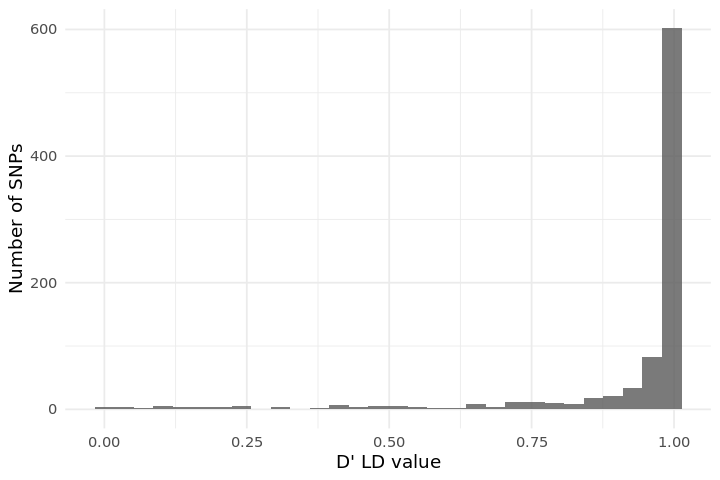

In [48]:
p = ggplot(df, aes(x=d)) + geom_histogram(alpha = 0.8) + 
    xlab("D' LD value") + ylab("Number of SNPs") + theme_minimal()
p

In [49]:
write.csv(df, paste0(revision_folder, "CRM_association_comparison_LD_values.csv"))

In [47]:
nrow(df)

[1] 984

In [315]:
S = unlist(strsplit(all_snps,"_"))
snps = c()
for (i in seq(2,(length(S)-1),4)){
   snps = c(snps,S[i]) 
}
snps = paste0("chr19:",snps)

In [316]:
head(all_snps)
head(snps)

[1] "19_8387207_G_A"  "19_7675917_C_G"  "19_57939619_C_T" "19_21513408_G_A"
[5] "19_54695163_T_C" "19_5783634_T_C"

[1] "chr19:8387207"  "chr19:7675917"  "chr19:57939619" "chr19:21513408"
[5] "chr19:54695163" "chr19:5783634"

In [319]:
# needed to request token by registering
LDmat = LDmatrix(snps, pop = "GBR", r2d = "d", token = "f88ab64286ce", file = FALSE)


LDlink server is working...



In [320]:
LDmat[1:5,1:5]

RS_number,rs10422590,rs10853988,rs9807887,rs2302307
rs10422590,1.000,0.161,0.139,0.193
rs10853988,0.161,1.000,0.265,0.248
rs9807887,0.139,0.265,1.000,0.041
rs2302307,0.193,0.248,0.041,1.000
rs12461613,0.006,0.062,0.033,0.177


In [321]:
ldMatrix = LDmat
rownames(ldMatrix) = ldMatrix$RS_number
ldMatrix$RS_number = c()
ldMatrix[1:5,1:5]

,rs10422590,rs10853988,rs9807887,rs2302307,rs12461613
rs10422590,1.000,0.161,0.139,0.193,0.006
rs10853988,0.161,1.000,0.265,0.248,0.062
rs9807887,0.139,0.265,1.000,0.041,0.033
rs2302307,0.193,0.248,0.041,1.000,0.177
rs12461613,0.006,0.062,0.033,0.177,1.000


In [322]:
write.csv(ldMatrix,"/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/REVISION/limix_qtl_pipeline_Gtest/top_snps_to_compare_LD.csv")

In [323]:
df$d = 0
for (i in 1:nrow(df)){
    snp1 = as.character(df[i,"snp_id.old"])
    snp2 = as.character(df[i,"snp_id.new"])
    if (!(snp1 %in% colnames(ldMatrix)) | !(snp2 %in% colnames(ldMatrix))){next}
    df[i,"d"] = as.numeric(ldMatrix[snp1,snp2])
}

In [366]:
T = 0.9
nrow(df)
c(nrow(df[df$d>T,]), nrow(df[df$d>T,])/nrow(df))

[1] 68

[1] 57.0000000  0.8382353

In [ ]:
# for variants 19_5783634_T_C (rs2446210) and 19_5799037_C_T (rs2436531) and CEU reference
# D' value (from https://ldlink.nci.nih.gov/?tab=ldpair) is 0.9114, R2 is 0.8307
# Pearson's correlation as implemented here considering our samples only: r=0.9559, r2=0.9137

In [ ]:
# for variants 19_57930256_T_G (rs12982691) 19_57920134_C_T (rs12461155) and CEU reference
# D' value (from https://ldlink.nci.nih.gov/?tab=ldpair) is 1.0, R2 is 1.0
# Pearson's correlation as implemented here considering our samples only: r=0.9918, r2=0.9837

In [ ]:
# for variants 19_24069443_T_C (rs79301965) 19_24147099_A_G (rs4932737) and CEU reference
# D' value (from https://ldlink.nci.nih.gov/?tab=ldpair) is 0.9732, R2 is 0.7977
# Pearson's correlation as implemented here considering our samples only: r=0.7731, r2=0.5977

In [ ]:
# for variants 19_47805348_C_G (rs111514713) and 19_47882416_T_G (rs2016429) and CEU reference
# D' value (from https://ldlink.nci.nih.gov/?tab=ldpair) is 0.7155, R2 is 0.0293 ---- NO LD
# Pearson's correlation as implemented here considering our samples only: r=-0.1636, r2=0.0268

In [ ]:
# for variants 19_39917761_G_A (rs251860) and 19_40085507_A_G (rs592786) and CEU reference
# D' value (from https://ldlink.nci.nih.gov/?tab=ldpair) is 0.6444, R2 is 0.0671
# when using GBR as reference, D'= 0.9081, R2 = 0.1109
# Pearson's correlation as implemented here considering our samples only: r=0.0673, r2=0.0045

In [ ]:
# for variants 19_588516_A_G (rs10422590) 19_607735_A_G (rs10853988) and CEU reference
# D' value (from https://ldlink.nci.nih.gov/?tab=ldpair) is 0.2197, R2 is 0.0043 ---- NO LD (GBR too)
# Pearson's correlation as implemented here considering our samples only: r=-0.2427, r2=0.0589

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
